In [1]:
import pandas as pd
import numpy as np
from numpy import math

import matplotlib.pyplot as plt
import time

# Motor 18 and Motor 16 datset Analysis

In [2]:
m18 = pd.read_csv('motor_18_data.csv')
m16 = pd.read_csv('motor_16_data.csv')
m18.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [3]:
m16.describe()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [4]:
m18.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
m16.head()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


# Objective 1: Data understanding

age: Age test_time: Time since recruitment into the trial. The integer part is the number of days since recruitment. The data use UPDRS scores as the gold standart. You can see an example of UPDRS questionnaire here.

motor_UPDRS: Clinician's motor UPDRS score, linearly interpolated. It refers to UPDRS-III, which are questions 18 to 31 in the UPDRS test. The minimum of points is 0 and maximum is 56 as the answers range from 0 to 4 points.

total_UPDRS: Clinician's total UPDRS score, linearly interpolated. The total points of UPDRS can go from 0 to 199 points.

# The 16 following are biomedical voice measures.

Jitter : Cycle-to-cycle variability in F0

Jitter(%) : Jitter as a percentage Jitter(Abs): Absolute jitter in microseconds Jitter:RAP: Relative amplitude perturbation Jitter:PPQ5: Five point period perturbation quotient Jitter:DDP: Differences between cycles, divided by the average periode Shimmer : Cycle-to-cycle variability amplitude

Shimmer: Local shimemr Shimmer(dB): Local shimemr in decibels Shimmer:APQ3: Three point Amplitude Perturbation Quotient Shimmer:APQ5: TFive point Amplitude Perturbation Quotient Shimmer:APQ11: 11-point Amplitude Perturbation Quotient Shimmer:DDA: Difference between the amplitudes od consecutive periods HArmonic and noise ratio

NHR: Harmonics-to-noise ratio HNR: Noise-to-harmonics ratio Speech signal processing methods

RPDE: Recurence period density entropy is the ability of the vocal folds to sustain simple vibration DFA: Detrended fluctuation analysis is the extent of turbulent noise in the speech signal PPE: Pitch period entropy is the impaired control of stable pitch during sustained phonation There were 5,875 voice recordings. The aim of the provided dataset is to predict the motor and total UPDRS score from the 16 voice measures.

Recordings are made at home using an At-Home Testing Device (AHTD).

The speech test is designed to take 4 minutes to execute.

The test is executed weekly.

The speech test is composed of three processes :

4 decay of normal intensity phonation for maximally sustained ‘‘Ah’’ phonation [1] 2 decay of loud intensity (twice the normal intensity) phonation for maximallysustained ‘‘Ah’’ [1] Intensity decays for descriptions of standardized pictures with and without ﬁnger tap-ping motor distraction. [2] The patients in this study were in early-stage and unmedicated Parkinson's Disease patients.

52 patients were enrolled in the study, but only 50 completed the 6-month period. From those, 48 remained without medication.

In [6]:
m18.sex.value_counts()

0    4008
1    1867
Name: sex, dtype: int64

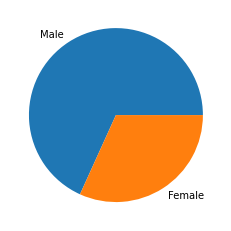

In [7]:
y = np.array([4008, 1867])
sex = ["Male", "Female"]

plt.pie(y, labels = sex)
plt.show() 

AxesSubplot(0.125,0.125;0.775x0.755)


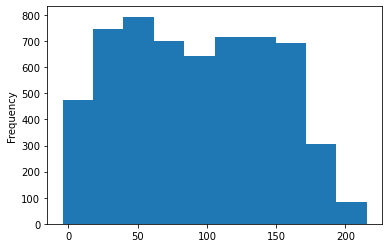

In [8]:
print(m18['test_time'].plot.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


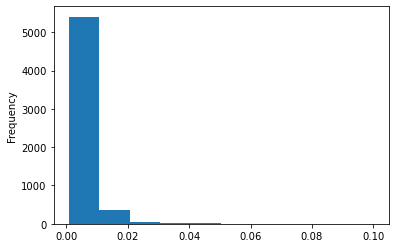

In [9]:
print(m18['Jitter(%)'].plot.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


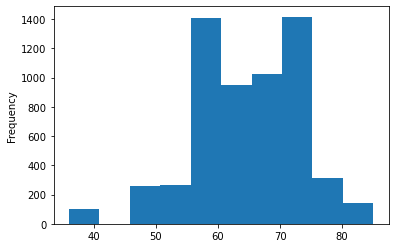

In [10]:
print(m18['age'].plot.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


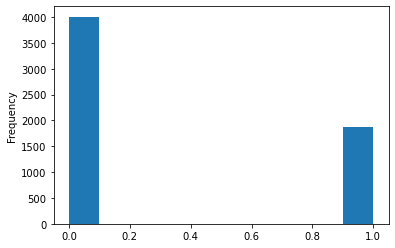

In [11]:
print(m18['sex'].plot.hist())

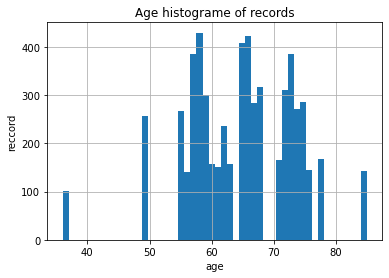

In [12]:
m18.hist('age', bins=50)

plt.ylabel('reccord')
plt.xlabel('age')
plt.title('Age histograme of records')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002238DAFB1C0>]],
      dtype=object)

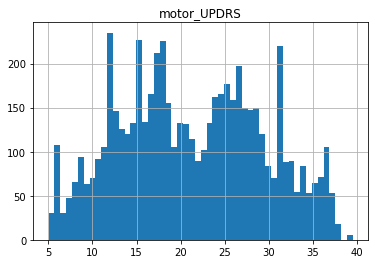

In [13]:
m18.hist('motor_UPDRS', bins=52)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002238DA208E0>]],
      dtype=object)

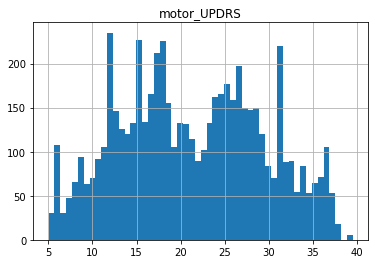

In [14]:
m16.hist('motor_UPDRS', bins=52)

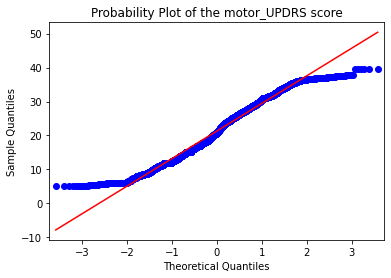

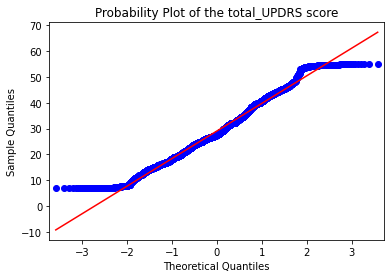

In [15]:
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(m18['motor_UPDRS'], line='s') 
py.title('Probability Plot of the motor_UPDRS score')

sm.qqplot(m18['total_UPDRS'], line='s') 
py.title('Probability Plot of the total_UPDRS score')

py.show()

# Objective 2:

Is there a correlation between the age of the patients and their motor UPDRS score ?

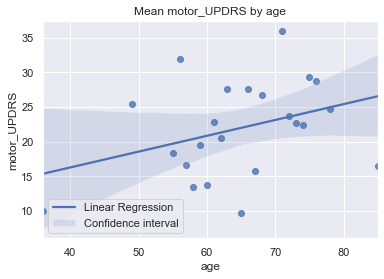

In [16]:
import seaborn as sns; sns.set()
dfage=m18.groupby('age',as_index=False).mean()

ax=sns.regplot(x='age',y='motor_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean motor_UPDRS by age')
plt.legend()
plt.show()

# Is there a correlation between the sex of the patient and their motor UPDRS score?

In [17]:
m18.groupby('sex',as_index=False).mean()

,sex,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,65.055389,93.221349,21.469349,29.724055,0.005956,0.000048,0.002824,0.003053,0.008471,...,0.302085,0.016750,0.019407,0.027162,0.050249,0.025269,21.679985,0.552449,0.661229,0.225827
1,1,64.267274,92.095983,20.924581,27.505234,0.006577,0.000036,0.003338,0.003758,0.010015,...,0.330013,0.018027,0.021727,0.028165,0.054081,0.046827,21.678445,0.517910,0.636088,0.206197


# !! Total 18 and Total 16 dataset Analysis

In [18]:
t18 = pd.read_csv('total_18_data.csv')
t16 = pd.read_csv('total_16_data.csv')
t16.describe()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [19]:
t18.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [20]:
t16.head()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## All the objectives of analysis are same as we do in the Motor Updrs like Age Sex and other features...

Some diifferences we analyze some total updrs graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002239057A130>]],
      dtype=object)

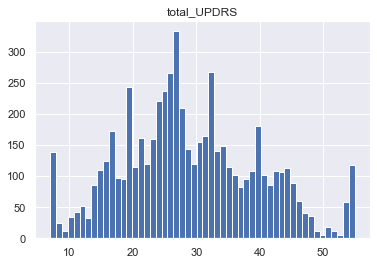

In [21]:
t18.hist('total_UPDRS', bins=52)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223906729D0>]],
      dtype=object)

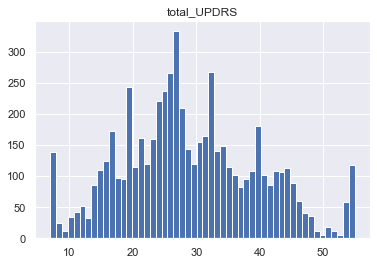

In [22]:
t16.hist('total_UPDRS', bins=52)

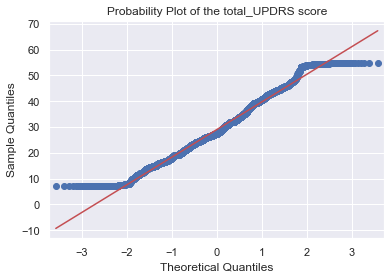

In [23]:
import statsmodels.api as sm 
import pylab as py 


sm.qqplot(t18['total_UPDRS'], line='s') 
py.title('Probability Plot of the total_UPDRS score')

py.show()

# Is there a correlation between the age of the patients and their total UPDRS score ?

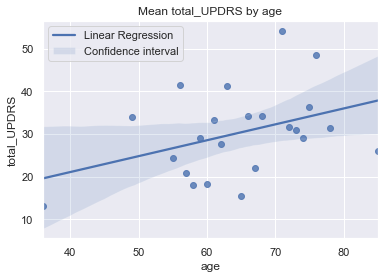

In [24]:
import seaborn as sns; sns.set()
dfage=t18.groupby('age',as_index=False).mean()

ax=sns.regplot(x='age',y='total_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean total_UPDRS by age')
plt.legend()
plt.show()

# Analyze some other features in the datset..

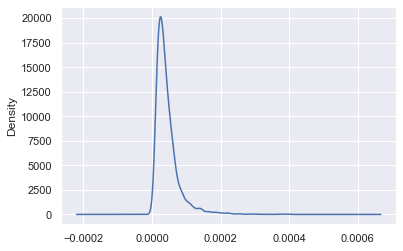

In [25]:
m18['Jitter(Abs)'].plot.kde()

*After outlier treatment kurtosis indicates less number of data points around the tail*

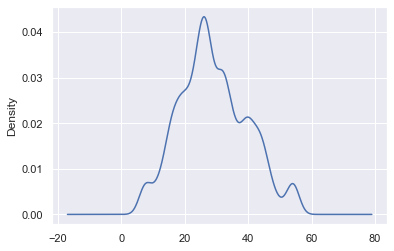

In [26]:
m18['total_UPDRS'].plot.kde()